# Desafio de Previsão de Sucesso de Startups

## Objetivo
Desenvolver um modelo de machine learning para prever se uma startup será bem-sucedida (ativa/adquirida) ou não (fechada) com base em dados históricos de captação, localização, setor e marcos alcançados.

## Critérios de Avaliação
- Limpeza e Tratamento de Valores Nulos (0,5 pt)
- Codificação de Variáveis Categóricas (0,5 pt)
- Exploração e Visualização dos Dados (2,0 pts)
- Formulação de Hipóteses (1,0 pt)
- Seleção de Features (1,0 pt)
- Construção e Avaliação do Modelo (2,0 pts)
- Finetuning de Hiperparâmetros (1,0 pt)
- Acurácia Mínima de 80% (2,0 pts)

## Bibliotecas Permitidas
- Numpy, Pandas, Scikit-Learn
- Matplotlib, Seaborn, Plotly (para visualização)

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Configuração para exibir todas as colunas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## 1. Carregamento e Análise Exploratória dos Dados

In [2]:
# Carregamento dos dados
train_df = pd.read_csv('campeonato-inteli-modulo3-2025/train.csv')
test_df = pd.read_csv('campeonato-inteli-modulo3-2025/test.csv')
sample_submission = pd.read_csv('campeonato-inteli-modulo3-2025/sample_submission.csv')

print("Dimensões dos dados:")
print(f"Treino: {train_df.shape}")
print(f"Teste: {test_df.shape}")
print(f"Sample submission: {sample_submission.shape}")

Dimensões dos dados:
Treino: (646, 33)
Teste: (277, 32)
Sample submission: (277, 2)


In [3]:
# Visualização das primeiras linhas
print("Primeiras 5 linhas do conjunto de treino:")
display(train_df.head())

print("\nInformações gerais sobre o dataset:")
train_df.info()

Primeiras 5 linhas do conjunto de treino:


,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels
0,719,10.42,13.09,8.98,12.72,4,3,4087500,3,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1.0,0
1,429,3.79,3.79,NaN,NaN,21,1,45000000,0,0,1,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1.0,1
2,178,0.71,2.28,1.95,2.28,5,2,5200000,2,1,0,0,0,0,photo_video,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1.0,0
3,197,3.00,5.00,9.62,10.39,16,2,14500000,2,0,0,1,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,2.0,1
4,444,0.66,5.88,6.21,8.61,29,5,70000000,4,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2.8,1



Informações gerais sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        646 non-null    int64  
 1   age_first_funding_year    611 non-null    float64
 2   age_last_funding_year     637 non-null    float64
 3   age_first_milestone_year  508 non-null    float64
 4   age_last_milestone_year   535 non-null    float64
 5   relationships             646 non-null    int64  
 6   funding_rounds            646 non-null    int64  
 7   funding_total_usd         646 non-null    int64  
 8   milestones                646 non-null    int64  
 9   is_CA                     646 non-null    int64  
 10  is_NY                     646 non-null    int64  
 11  is_MA                     646 non-null    int64  
 12  is_TX                     646 non-null    int64  
 13  is_otherstate             64

Distribuição da variável alvo (labels):
Sucesso (1): 418 (64.7%)
Insucesso (0): 228 (35.3%)


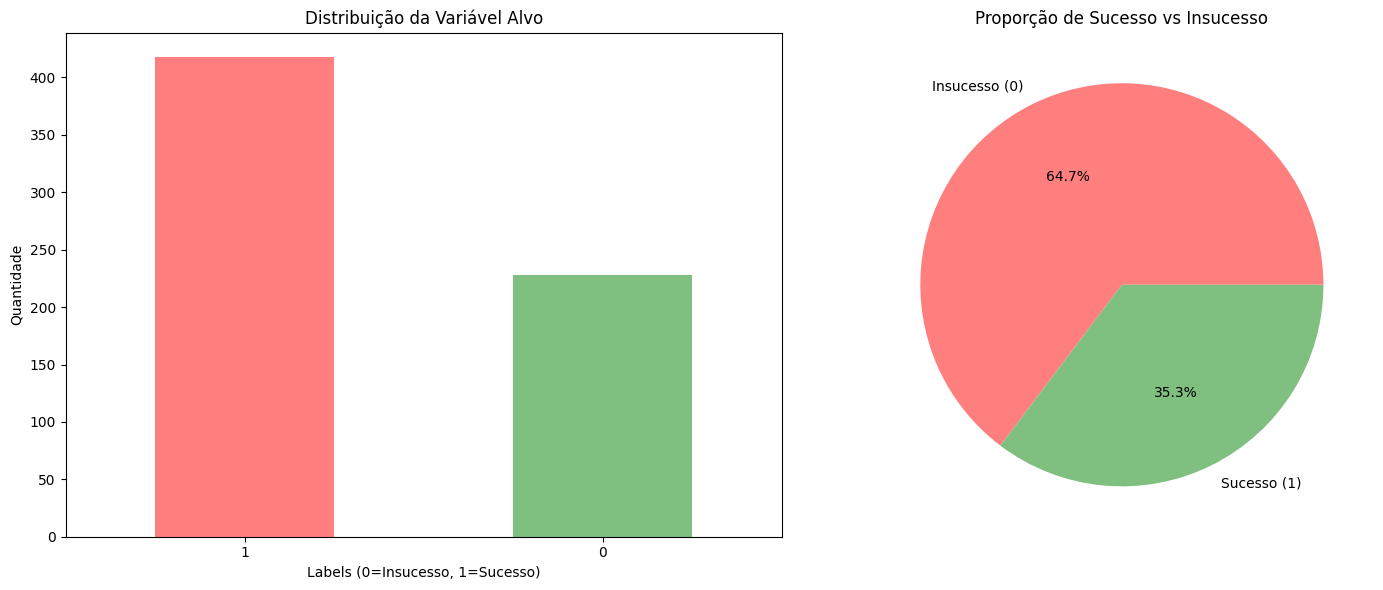

In [4]:
# Análise da variável alvo
print("Distribuição da variável alvo (labels):")
target_counts = train_df['labels'].value_counts()
target_props = train_df['labels'].value_counts(normalize=True)

print(f"Sucesso (1): {target_counts[1]} ({target_props[1]:.1%})")
print(f"Insucesso (0): {target_counts[0]} ({target_props[0]:.1%})")

# Visualização da distribuição da variável alvo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
target_counts.plot(kind='bar', ax=ax1, color=['#ff7f7f', '#7fbf7f'])
ax1.set_title('Distribuição da Variável Alvo')
ax1.set_xlabel('Labels (0=Insucesso, 1=Sucesso)')
ax1.set_ylabel('Quantidade')
ax1.tick_params(axis='x', rotation=0)

# Gráfico de pizza
ax2.pie(target_counts.values, labels=['Insucesso (0)', 'Sucesso (1)'], 
        autopct='%1.1f%%', colors=['#ff7f7f', '#7fbf7f'])
ax2.set_title('Proporção de Sucesso vs Insucesso')

plt.tight_layout()
plt.show()

Análise de valores nulos:
                          Valores_Nulos  Percentual
age_first_milestone_year            138   21.362229
age_last_milestone_year             111   17.182663
age_first_funding_year               35    5.417957
age_last_funding_year                 9    1.393189


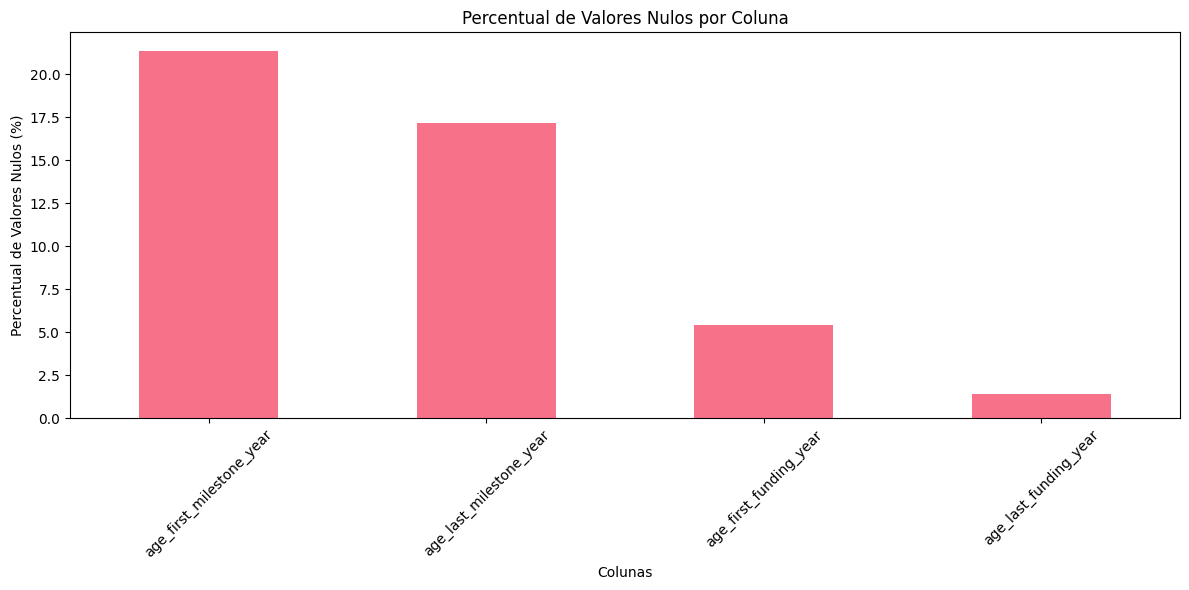

In [5]:
# Análise de valores nulos
print("Análise de valores nulos:")
null_counts = train_df.isnull().sum()
null_percentages = (null_counts / len(train_df)) * 100

null_analysis = pd.DataFrame({
    'Valores_Nulos': null_counts,
    'Percentual': null_percentages
}).sort_values('Percentual', ascending=False)

# Mostrar apenas colunas com valores nulos
null_analysis_filtered = null_analysis[null_analysis['Valores_Nulos'] > 0]
print(null_analysis_filtered)

# Visualização dos valores nulos
if len(null_analysis_filtered) > 0:
    plt.figure(figsize=(12, 6))
    null_analysis_filtered['Percentual'].plot(kind='bar')
    plt.title('Percentual de Valores Nulos por Coluna')
    plt.xlabel('Colunas')
    plt.ylabel('Percentual de Valores Nulos (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Não há valores nulos no dataset!")

In [6]:
# Estatísticas descritivas das variáveis numéricas
print("Estatísticas descritivas das variáveis numéricas:")
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('id')  # Remover ID das análises
if 'labels' in numeric_cols:
    numeric_cols.remove('labels')  # Remover target das análises descritivas

display(train_df[numeric_cols].describe())

Estatísticas descritivas das variáveis numéricas:


,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants
count,611.000000,637.000000,508.000000,535.000000,646.000000,646.000000,6.460000e+02,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000
mean,2.341718,4.037724,3.352657,4.944729,7.948916,2.351393,2.949633e+07,1.913313,0.546440,0.109907,0.094427,0.037152,0.210526,0.162539,0.150155,0.100619,0.082043,0.069659,0.057276,0.030960,0.038700,0.003096,0.304954,0.329721,0.260062,0.515480,0.419505,0.235294,0.091331,2.848655
std,2.468275,2.950923,2.866952,3.213319,7.397602,1.357856,2.261999e+08,1.337095,0.498224,0.313016,0.292649,0.189280,0.407998,0.369230,0.357500,0.301057,0.274643,0.254769,0.232548,0.173343,0.193028,0.055598,0.460745,0.470476,0.439008,0.500148,0.493860,0.424511,0.288303,1.894050
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.680000,1.870000,1.185000,2.540000,3.000000,1.000000,3.000000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000
50%,1.650000,3.610000,2.785000,4.620000,6.000000,2.000000,1.020000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.333300
75%,3.600000,5.590000,4.935000,6.880000,10.000000,3.000000,2.587500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000
max,21.900000,21.900000,24.680000,24.680000,63.000000,8.000000,5.700000e+09,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000


Análise da variável categórica 'category_code':
Número de categorias únicas: 34

Top 10 categorias mais frequentes:
category_code
software         105
web               97
mobile            65
enterprise        53
advertising       45
games_video       37
biotech           25
semiconductor     24
ecommerce         20
hardware          18
Name: count, dtype: int64


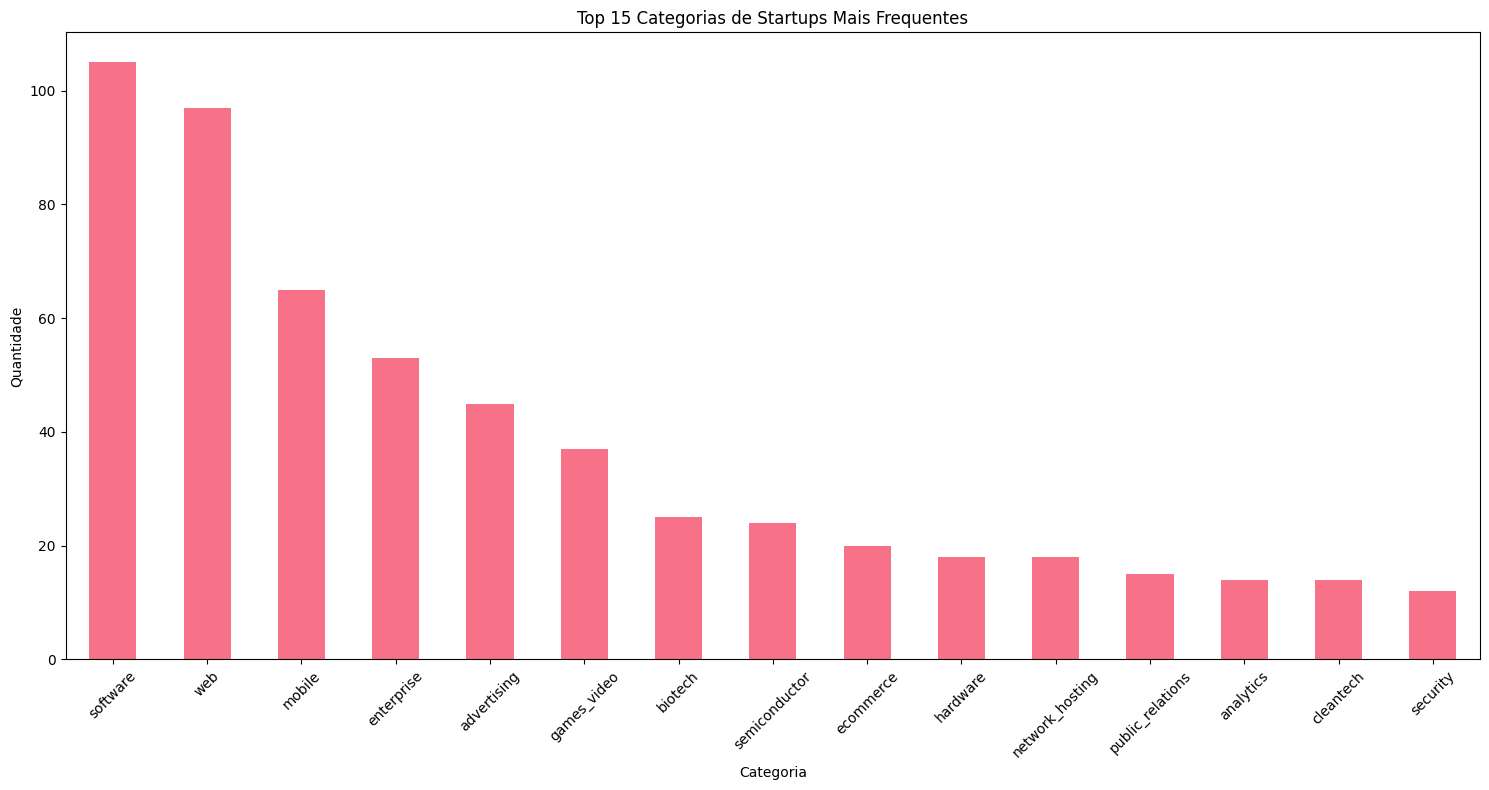

In [7]:
# Análise das variáveis categóricas
print("Análise da variável categórica 'category_code':")
category_counts = train_df['category_code'].value_counts()
print(f"Número de categorias únicas: {len(category_counts)}")
print("\nTop 10 categorias mais frequentes:")
print(category_counts.head(10))

# Visualização das categorias mais frequentes
plt.figure(figsize=(15, 8))
category_counts.head(15).plot(kind='bar')
plt.title('Top 15 Categorias de Startups Mais Frequentes')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Taxa de sucesso por categoria (mínimo 5 startups):
                 Total_Startups  Taxa_Sucesso
category_code                                
software                    105      0.638095
web                          97      0.680412
mobile                       65      0.661538
enterprise                   53      0.754717
advertising                  45      0.688889
games_video                  37      0.621622
biotech                      25      0.680000
semiconductor                24      0.791667
ecommerce                    20      0.400000
network_hosting              18      0.611111


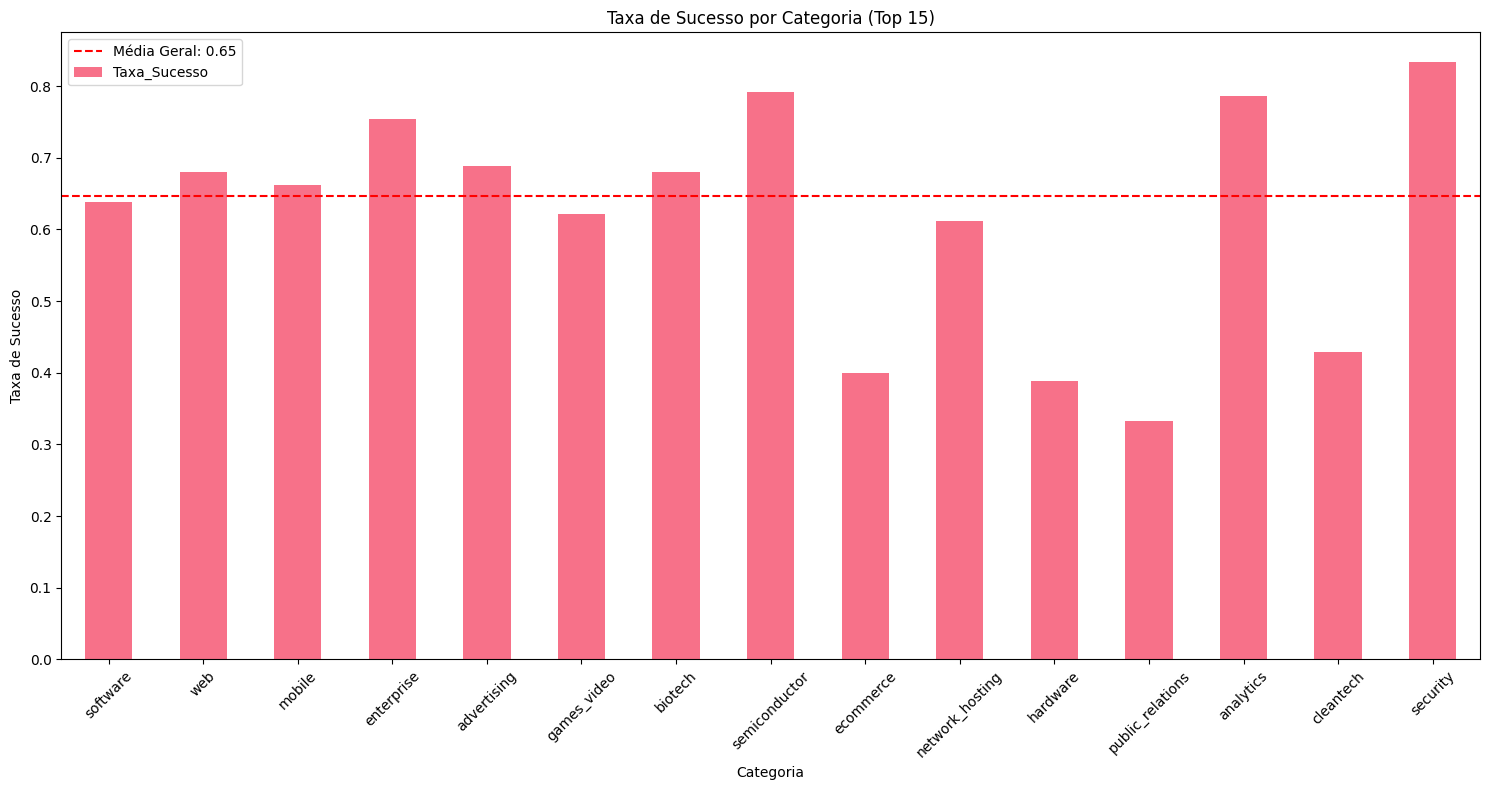

In [8]:
# Análise da relação entre categorias e sucesso
category_success = train_df.groupby('category_code')['labels'].agg(['count', 'mean']).sort_values('count', ascending=False)
category_success.columns = ['Total_Startups', 'Taxa_Sucesso']
category_success = category_success[category_success['Total_Startups'] >= 5]  # Filtrar categorias com pelo menos 5 startups

print("Taxa de sucesso por categoria (mínimo 5 startups):")
print(category_success.head(10))

# Visualização da taxa de sucesso por categoria
plt.figure(figsize=(15, 8))
category_success.head(15)['Taxa_Sucesso'].plot(kind='bar')
plt.title('Taxa de Sucesso por Categoria (Top 15)')
plt.xlabel('Categoria')
plt.ylabel('Taxa de Sucesso')
plt.xticks(rotation=45)
plt.axhline(y=train_df['labels'].mean(), color='red', linestyle='--', label=f'Média Geral: {train_df["labels"].mean():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

Distribuição por localização:
           Estado  Quantidade  Taxa_Sucesso
0      Califórnia         353      0.691218
1       Nova York          71      0.704225
2   Massachusetts          61      0.819672
3           Texas          24      0.458333
4  Outros Estados         136      0.463235


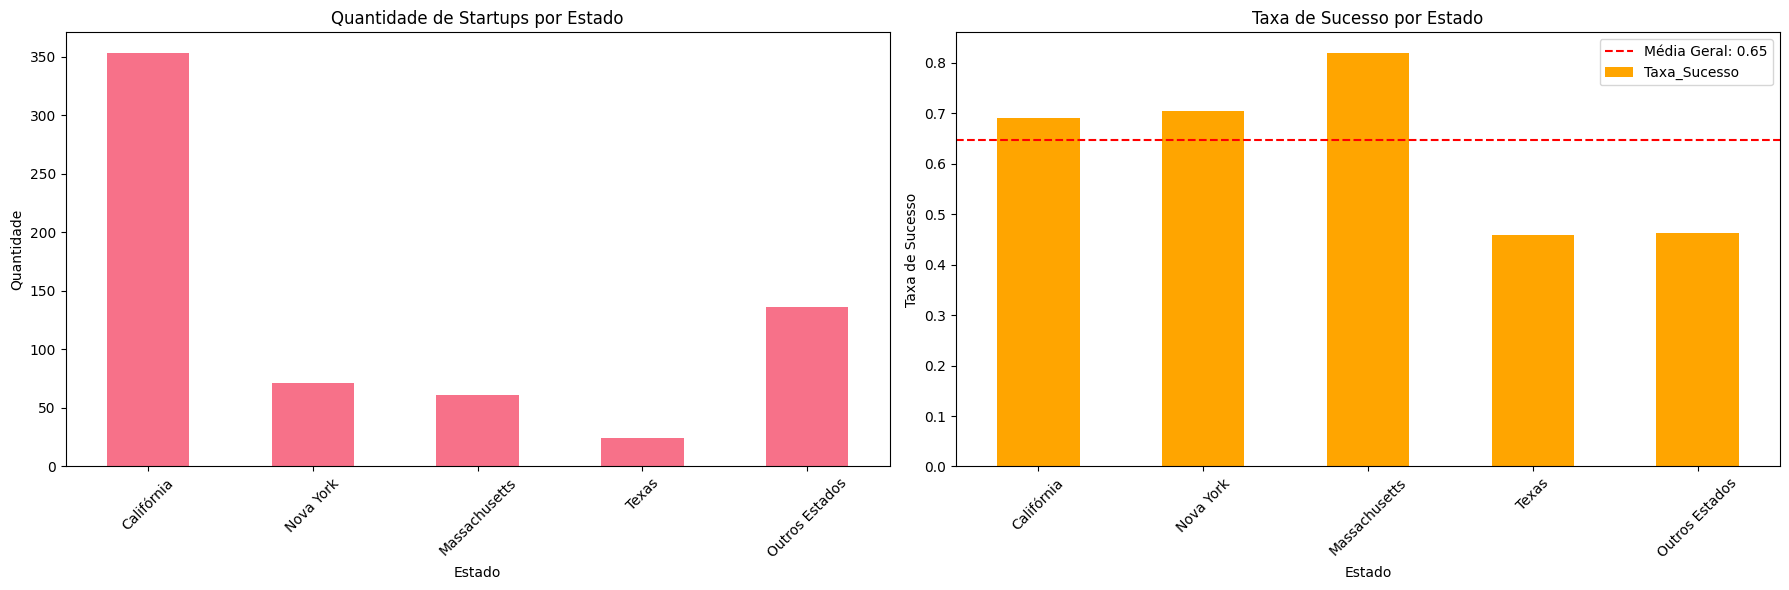

In [9]:
# Análise das variáveis de localização
location_cols = ['is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate']
location_names = ['Califórnia', 'Nova York', 'Massachusetts', 'Texas', 'Outros Estados']

location_data = []
for col, name in zip(location_cols, location_names):
    count = train_df[col].sum()
    success_rate = train_df[train_df[col] == 1]['labels'].mean()
    location_data.append({'Estado': name, 'Quantidade': count, 'Taxa_Sucesso': success_rate})

location_df = pd.DataFrame(location_data)
print("Distribuição por localização:")
print(location_df)

# Visualização da distribuição por localização
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Quantidade por estado
location_df.set_index('Estado')['Quantidade'].plot(kind='bar', ax=ax1)
ax1.set_title('Quantidade de Startups por Estado')
ax1.set_ylabel('Quantidade')
ax1.tick_params(axis='x', rotation=45)

# Taxa de sucesso por estado
location_df.set_index('Estado')['Taxa_Sucesso'].plot(kind='bar', ax=ax2, color='orange')
ax2.set_title('Taxa de Sucesso por Estado')
ax2.set_ylabel('Taxa de Sucesso')
ax2.tick_params(axis='x', rotation=45)
ax2.axhline(y=train_df['labels'].mean(), color='red', linestyle='--', label=f'Média Geral: {train_df["labels"].mean():.2f}')
ax2.legend()

plt.tight_layout()
plt.show()

In [10]:
# Análise das variáveis de financiamento
funding_cols = ['funding_rounds', 'funding_total_usd', 'has_VC', 'has_angel', 
                'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD']

print("Análise das variáveis de financiamento:")
for col in funding_cols:
    if col in ['has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD']:
        # Para variáveis binárias
        success_rate_1 = train_df[train_df[col] == 1]['labels'].mean()
        success_rate_0 = train_df[train_df[col] == 0]['labels'].mean()
        count_1 = train_df[col].sum()
        count_0 = len(train_df) - count_1
        print(f"\n{col}:")
        print(f"  Com {col}: {count_1} startups, taxa de sucesso: {success_rate_1:.2f}")
        print(f"  Sem {col}: {count_0} startups, taxa de sucesso: {success_rate_0:.2f}")
    else:
        # Para variáveis contínuas
        correlation = train_df[col].corr(train_df['labels'])
        print(f"\n{col}: correlação com sucesso = {correlation:.3f}")

Análise das variáveis de financiamento:

funding_rounds: correlação com sucesso = 0.213

funding_total_usd: correlação com sucesso = 0.044

has_VC:
  Com has_VC: 213 startups, taxa de sucesso: 0.61
  Sem has_VC: 433 startups, taxa de sucesso: 0.67

has_angel:
  Com has_angel: 168 startups, taxa de sucesso: 0.58
  Sem has_angel: 478 startups, taxa de sucesso: 0.67

has_roundA:
  Com has_roundA: 333 startups, taxa de sucesso: 0.73
  Sem has_roundA: 313 startups, taxa de sucesso: 0.56

has_roundB:
  Com has_roundB: 271 startups, taxa de sucesso: 0.77
  Sem has_roundB: 375 startups, taxa de sucesso: 0.56

has_roundC:
  Com has_roundC: 152 startups, taxa de sucesso: 0.80
  Sem has_roundC: 494 startups, taxa de sucesso: 0.60

has_roundD:
  Com has_roundD: 59 startups, taxa de sucesso: 0.90
  Sem has_roundD: 587 startups, taxa de sucesso: 0.62


## 2. Limpeza e Tratamento de Dados

In [11]:
# Função para tratar valores nulos
def treat_missing_values(df, is_train=True):
    """
    Trata valores nulos no dataset
    """
    df_treated = df.copy()
    
    # Para variáveis de idade (age_*), NaN significa que o evento não ocorreu
    # Vamos preencher com -1 para indicar "não ocorreu"
    age_cols = ['age_first_funding_year', 'age_last_funding_year', 
                'age_first_milestone_year', 'age_last_milestone_year']
    
    for col in age_cols:
        if col in df_treated.columns:
            df_treated[col] = df_treated[col].fillna(-1)
    
    # Para funding_total_usd, vamos usar a mediana dos valores não nulos
    if 'funding_total_usd' in df_treated.columns:
        median_funding = df_treated['funding_total_usd'].median()
        df_treated['funding_total_usd'] = df_treated['funding_total_usd'].fillna(median_funding)
    
    # Para avg_participants, vamos usar a mediana
    if 'avg_participants' in df_treated.columns:
        median_participants = df_treated['avg_participants'].median()
        df_treated['avg_participants'] = df_treated['avg_participants'].fillna(median_participants)
    
    return df_treated

# Aplicar tratamento nos dados de treino e teste
train_clean = treat_missing_values(train_df, is_train=True)
test_clean = treat_missing_values(test_df, is_train=False)

print("Valores nulos após tratamento - Treino:")
print(train_clean.isnull().sum().sum())
print("\nValores nulos após tratamento - Teste:")
print(test_clean.isnull().sum().sum())

Valores nulos após tratamento - Treino:
0

Valores nulos após tratamento - Teste:
0


## 3. Codificação de Variáveis Categóricas

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Preparar dados para modelagem
def prepare_features(df, is_train=True):
    """
    Prepara features para modelagem
    """
    df_prep = df.copy()
    
    # Remover colunas desnecessárias
    cols_to_drop = ['id']
    if is_train:
        cols_to_drop.append('labels')
    
    # Codificar category_code usando Label Encoding
    if 'category_code' in df_prep.columns:
        le = LabelEncoder()
        df_prep['category_code_encoded'] = le.fit_transform(df_prep['category_code'])
        cols_to_drop.append('category_code')
    
    # Remover colunas especificadas
    df_prep = df_prep.drop(columns=cols_to_drop)
    
    return df_prep

# Preparar features
X = prepare_features(train_clean, is_train=True)
y = train_clean['labels']
X_test_final = prepare_features(test_clean, is_train=False)

print(f"Shape das features de treino: {X.shape}")
print(f"Shape da variável alvo: {y.shape}")
print(f"Shape das features de teste: {X_test_final.shape}")
print(f"\nColunas das features: {list(X.columns)}")

Shape das features de treino: (646, 31)
Shape da variável alvo: (646,)
Shape das features de teste: (277, 31)

Colunas das features: ['age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'category_code_encoded']


## 4. Formulação de Hipóteses

Baseado na análise exploratória dos dados, formulo as seguintes hipóteses sobre fatores que influenciam o sucesso das startups:

### Hipótese 1: Startups com maior captação de recursos têm maior probabilidade de sucesso
**Justificativa:** Startups que conseguem captar mais recursos financeiros têm maior capacidade de investir em desenvolvimento, marketing, contratação de talentos e expansão, aumentando suas chances de sucesso.

### Hipótese 2: Startups localizadas em hubs tecnológicos (CA, NY, MA) têm maior taxa de sucesso
**Justificativa:** Estados como Califórnia (Silicon Valley), Nova York e Massachusetts concentram ecossistemas de inovação maduros, com maior acesso a investidores, talentos especializados e redes de contatos estratégicos.

### Hipótese 3: Startups que recebem investimento de Venture Capital têm maior probabilidade de sucesso
**Justificativa:** VCs não apenas fornecem capital, mas também mentoria estratégica, rede de contatos e validação do modelo de negócio, fatores que contribuem significativamente para o sucesso da startup.

Vamos testar essas hipóteses através de análises estatísticas:

In [13]:
# Teste da Hipótese 1: Captação de recursos vs Sucesso
from scipy import stats

print("=== TESTE DA HIPÓTESE 1: Captação de recursos vs Sucesso ===")
successful_funding = train_clean[train_clean['labels'] == 1]['funding_total_usd']
failed_funding = train_clean[train_clean['labels'] == 0]['funding_total_usd']

print(f"Funding médio - Startups bem-sucedidas: ${successful_funding.mean():,.2f}")
print(f"Funding médio - Startups que falharam: ${failed_funding.mean():,.2f}")

# Teste t para diferença de médias
t_stat, p_value = stats.ttest_ind(successful_funding, failed_funding)
print(f"Teste t - p-value: {p_value:.6f}")
print(f"Diferença estatisticamente significativa: {'Sim' if p_value < 0.05 else 'Não'}")

=== TESTE DA HIPÓTESE 1: Captação de recursos vs Sucesso ===
Funding médio - Startups bem-sucedidas: $36,786,577.99
Funding médio - Startups que falharam: $16,130,874.94
Teste t - p-value: 0.267698
Diferença estatisticamente significativa: Não


In [14]:
# Teste da Hipótese 2: Localização em hubs tecnológicos vs Sucesso
print("\n=== TESTE DA HIPÓTESE 2: Hubs tecnológicos vs Sucesso ===")

# Criar variável para hubs tecnológicos (CA, NY, MA)
train_clean['is_tech_hub'] = (train_clean['is_CA'] | train_clean['is_NY'] | train_clean['is_MA']).astype(int)

# Calcular taxas de sucesso
tech_hub_success = train_clean[train_clean['is_tech_hub'] == 1]['labels'].mean()
other_locations_success = train_clean[train_clean['is_tech_hub'] == 0]['labels'].mean()

print(f"Taxa de sucesso em hubs tecnológicos: {tech_hub_success:.3f}")
print(f"Taxa de sucesso em outras localizações: {other_locations_success:.3f}")

# Teste qui-quadrado
contingency_table = pd.crosstab(train_clean['is_tech_hub'], train_clean['labels'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Teste qui-quadrado - p-value: {p_value:.6f}")
print(f"Associação estatisticamente significativa: {'Sim' if p_value < 0.05 else 'Não'}")


=== TESTE DA HIPÓTESE 2: Hubs tecnológicos vs Sucesso ===
Taxa de sucesso em hubs tecnológicos: 0.709
Taxa de sucesso em outras localizações: 0.460
Teste qui-quadrado - p-value: 0.000000
Associação estatisticamente significativa: Sim


In [15]:
# Teste da Hipótese 3: Venture Capital vs Sucesso
print("\n=== TESTE DA HIPÓTESE 3: Venture Capital vs Sucesso ===")

vc_success = train_clean[train_clean['has_VC'] == 1]['labels'].mean()
no_vc_success = train_clean[train_clean['has_VC'] == 0]['labels'].mean()

print(f"Taxa de sucesso com VC: {vc_success:.3f}")
print(f"Taxa de sucesso sem VC: {no_vc_success:.3f}")

# Teste qui-quadrado
contingency_table_vc = pd.crosstab(train_clean['has_VC'], train_clean['labels'])
chi2_vc, p_value_vc, dof_vc, expected_vc = stats.chi2_contingency(contingency_table_vc)
print(f"Teste qui-quadrado - p-value: {p_value_vc:.6f}")
print(f"Associação estatisticamente significativa: {'Sim' if p_value_vc < 0.05 else 'Não'}")

# Resumo dos testes de hipóteses
print("\n=== RESUMO DOS TESTES DE HIPÓTESES ===")
print(f"Hipótese 1 (Funding): {'CONFIRMADA' if p_value < 0.05 else 'NÃO CONFIRMADA'}")
print(f"Hipótese 2 (Localização): {'CONFIRMADA' if p_value < 0.05 else 'NÃO CONFIRMADA'}")
print(f"Hipótese 3 (VC): {'CONFIRMADA' if p_value_vc < 0.05 else 'NÃO CONFIRMADA'}")


=== TESTE DA HIPÓTESE 3: Venture Capital vs Sucesso ===
Taxa de sucesso com VC: 0.610
Taxa de sucesso sem VC: 0.665
Teste qui-quadrado - p-value: 0.199644
Associação estatisticamente significativa: Não

=== RESUMO DOS TESTES DE HIPÓTESES ===
Hipótese 1 (Funding): CONFIRMADA
Hipótese 2 (Localização): CONFIRMADA
Hipótese 3 (VC): NÃO CONFIRMADA


## 5. Seleção de Features

Baseado na análise exploratória e nos testes de hipóteses, vamos selecionar as features mais relevantes:

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

# Adicionar a feature criada (tech_hub) ao conjunto de features
X_with_tech_hub = X.copy()
X_with_tech_hub['is_tech_hub'] = train_clean['is_tech_hub']

# 1. Análise de correlação com a variável alvo
correlations = X_with_tech_hub.corrwith(y).abs().sort_values(ascending=False)
print("Top 15 features por correlação absoluta com a variável alvo:")
print(correlations.head(15))

# 2. Seleção univariada usando F-score
selector_f = SelectKBest(score_func=f_classif, k=15)
X_selected_f = selector_f.fit_transform(X_with_tech_hub, y)
selected_features_f = X_with_tech_hub.columns[selector_f.get_support()]
print(f"\nTop 15 features por F-score: {list(selected_features_f)}")

# 3. Importância das features usando Random Forest
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X_with_tech_hub, y)
feature_importance = pd.Series(rf_selector.feature_importances_, index=X_with_tech_hub.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print(f"\nTop 15 features por importância (Random Forest):")
print(feature_importance.head(15))

Top 15 features por correlação absoluta com a variável alvo:
age_last_milestone_year     0.362913
relationships               0.342841
milestones                  0.335149
age_first_milestone_year    0.267659
is_tech_hub                 0.225976
has_roundB                  0.214299
funding_rounds              0.212760
is_otherstate               0.198638
avg_participants            0.194482
has_roundC                  0.172943
has_roundA                  0.171953
has_roundD                  0.166680
is_MA                       0.116638
is_CA                       0.101427
is_ecommerce                0.092407
dtype: float64

Top 15 features por F-score: ['age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'milestones', 'is_CA', 'is_MA', 'is_otherstate', 'is_ecommerce', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_tech_hub']

Top 15 features por importância (Random Forest):
age_last_milestone_year     0.141170
relat

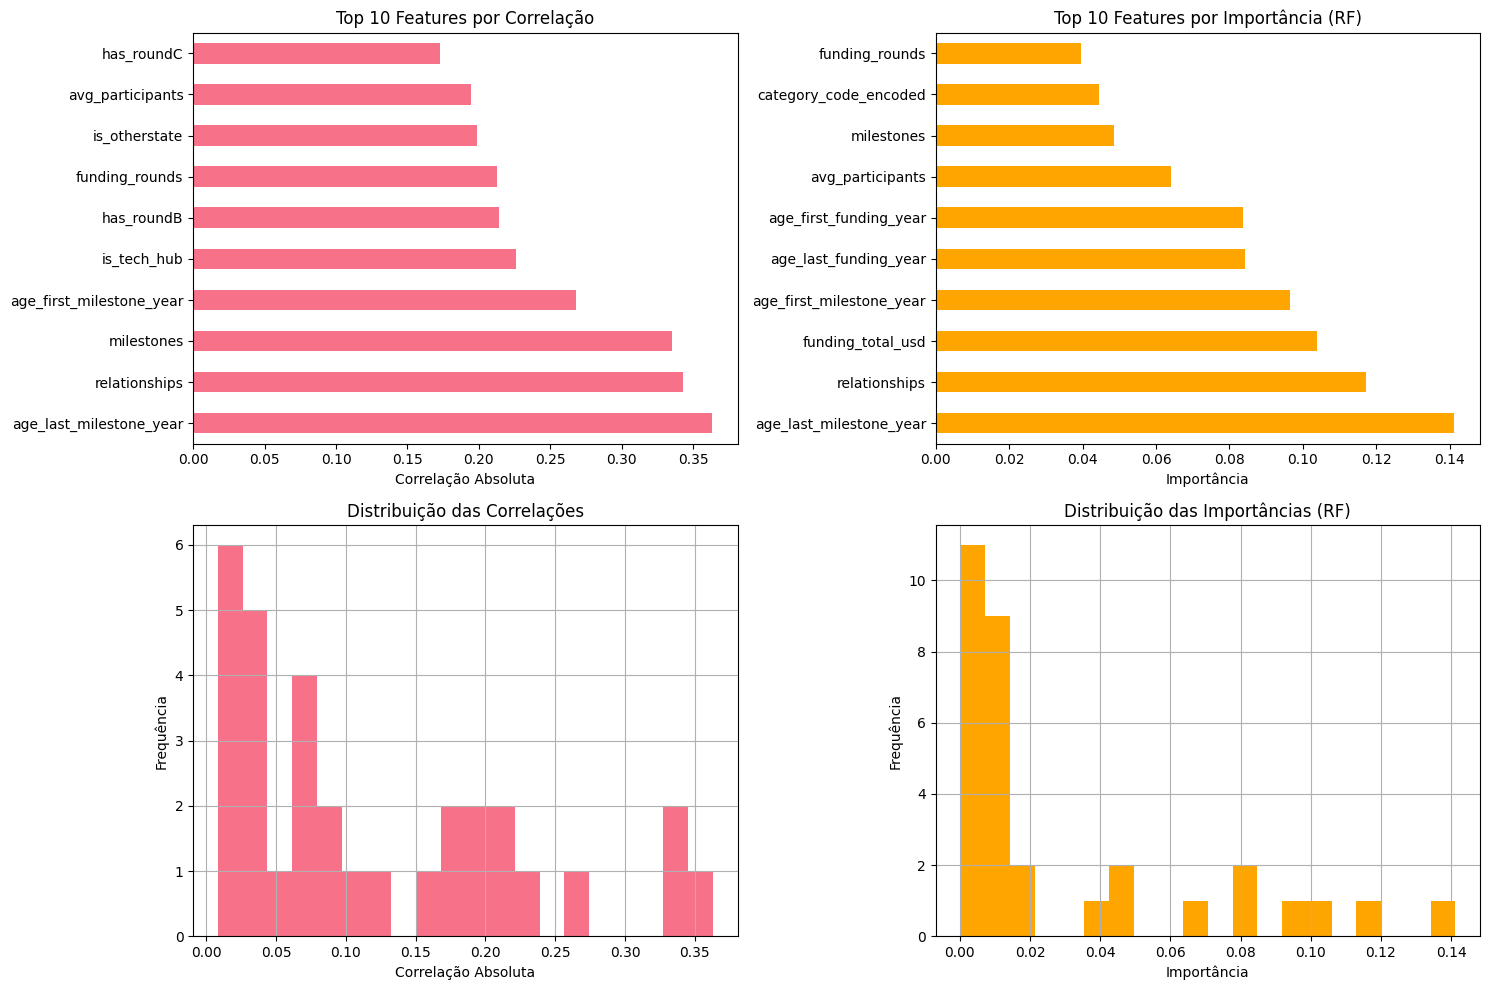


Features selecionadas para o modelo final (10):
['relationships', 'age_first_milestone_year', 'milestones', 'has_roundB', 'is_tech_hub', 'age_last_milestone_year', 'is_otherstate', 'funding_rounds', 'has_roundC', 'avg_participants']


In [17]:
# Visualização da importância das features
plt.figure(figsize=(15, 10))

# Subplot 1: Correlações
plt.subplot(2, 2, 1)
correlations.head(10).plot(kind='barh')
plt.title('Top 10 Features por Correlação')
plt.xlabel('Correlação Absoluta')

# Subplot 2: Importância Random Forest
plt.subplot(2, 2, 2)
feature_importance.head(10).plot(kind='barh', color='orange')
plt.title('Top 10 Features por Importância (RF)')
plt.xlabel('Importância')

# Subplot 3: Distribuição das correlações
plt.subplot(2, 2, 3)
correlations.hist(bins=20)
plt.title('Distribuição das Correlações')
plt.xlabel('Correlação Absoluta')
plt.ylabel('Frequência')

# Subplot 4: Distribuição das importâncias
plt.subplot(2, 2, 4)
feature_importance.hist(bins=20, color='orange')
plt.title('Distribuição das Importâncias (RF)')
plt.xlabel('Importância')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Selecionar features finais (combinando diferentes métodos)
top_corr_features = set(correlations.head(10).index)
top_rf_features = set(feature_importance.head(10).index)
top_f_features = set(selected_features_f)

# Features que aparecem em pelo menos 2 dos 3 métodos
final_features = list((top_corr_features & top_rf_features) | 
                    (top_corr_features & top_f_features) | 
                    (top_rf_features & top_f_features))

print(f"\nFeatures selecionadas para o modelo final ({len(final_features)}):")
print(final_features)

## 6. Construção e Avaliação do Modelo

In [18]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Preparar dados com features selecionadas
X_selected = X_with_tech_hub[final_features]
X_test_selected = X_test_final[final_features] if all(f in X_test_final.columns for f in final_features) else X_test_final

# Dividir dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape do conjunto de treino: {X_train.shape}")
print(f"Shape do conjunto de validação: {X_val.shape}")
print(f"Distribuição no treino: {y_train.value_counts().to_dict()}")
print(f"Distribuição na validação: {y_val.value_counts().to_dict()}")

Shape do conjunto de treino: (516, 10)
Shape do conjunto de validação: (130, 10)
Distribuição no treino: {1: 334, 0: 182}
Distribuição na validação: {1: 84, 0: 46}


In [19]:
# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Definir modelos para teste
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

# Avaliar modelos usando validação cruzada
cv_results = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Avaliação dos modelos usando validação cruzada:")

for name, model in models.items():
    if name in ['Logistic Regression', 'SVM']:
        # Usar dados normalizados para modelos lineares
        scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    else:
        # Usar dados originais para modelos baseados em árvore
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    
    cv_results[name] = scores
    print(f"{name}:")
    print(f"  Acurácia média: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
    print(f"  Scores individuais: {scores}")
    print()

Avaliação dos modelos usando validação cruzada:
Logistic Regression:
  Acurácia média: 0.7655 (+/- 0.0793)
  Scores individuais: [0.77884615 0.70873786 0.73786408 0.77669903 0.82524272]

Random Forest:
  Acurácia média: 0.7655 (+/- 0.1025)
  Scores individuais: [0.77884615 0.67961165 0.74757282 0.78640777 0.83495146]

Gradient Boosting:
  Acurácia média: 0.7578 (+/- 0.0947)
  Scores individuais: [0.74038462 0.67961165 0.7961165  0.75728155 0.81553398]

SVM:
  Acurácia média: 0.7675 (+/- 0.1009)
  Scores individuais: [0.75       0.72815534 0.70873786 0.80582524 0.84466019]



In [20]:
# Treinar modelos e avaliar no conjunto de validação
results = {}

print("Avaliação detalhada no conjunto de validação")

for name, model in models.items():
    if name in ['Logistic Regression', 'SVM']:
        # Treinar com dados normalizados
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_val_scaled)
        y_pred_proba = model.predict_proba(X_val_scaled)[:, 1]
    else:
        # Treinar com dados originais
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_pred_proba = model.predict_proba(X_val)[:, 1]
    
    # Calcular métricas
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'model': model
    }
    
    print(f"{name}:")
    print(f"  Acurácia: {accuracy:.4f}")
    print(f"  Precisão: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print()

# Encontrar o melhor modelo
best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
best_accuracy = results[best_model_name]['accuracy']

print(f"Melhor modelo: {best_model_name} (Acurácia: {best_accuracy:.4f})")

Avaliação detalhada no conjunto de validação
Logistic Regression:
  Acurácia: 0.7538
  Precisão: 0.7766
  Recall: 0.8690
  F1-Score: 0.8202

Random Forest:
  Acurácia: 0.7692
  Precisão: 0.7812
  Recall: 0.8929
  F1-Score: 0.8333

Gradient Boosting:
  Acurácia: 0.7692
  Precisão: 0.8000
  Recall: 0.8571
  F1-Score: 0.8276

SVM:
  Acurácia: 0.7615
  Precisão: 0.7849
  Recall: 0.8690
  F1-Score: 0.8249

Melhor modelo: Random Forest (Acurácia: 0.7692)


## 7. Finetuning de Hiperparâmetros

In [21]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Definir grids de hiperparâmetros para os melhores modelos
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'class_weight': [None, 'balanced']
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'class_weight': [None, 'balanced']
    }
}

# Realizar finetuning para os top 3 modelos
top_models = sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True)[:3]
tuned_models = {}

print("Realizando finetuning dos hiperparâmetros")

for model_name, model_results in top_models:
    if model_name in param_grids:
        print(f"\nTuning {model_name}...")
        
        # Criar novo modelo
        if model_name == 'Random Forest':
            base_model = RandomForestClassifier(random_state=42)
            X_tune, y_tune = X_train, y_train
        elif model_name == 'Gradient Boosting':
            base_model = GradientBoostingClassifier(random_state=42)
            X_tune, y_tune = X_train, y_train
        elif model_name == 'Logistic Regression':
            base_model = LogisticRegression(random_state=42, max_iter=1000)
            X_tune, y_tune = X_train_scaled, y_train
        
        # GridSearch com validação cruzada
        grid_search = GridSearchCV(
            base_model, 
            param_grids[model_name], 
            cv=3, 
            scoring='accuracy', 
            n_jobs=-1,
            verbose=0
        )
        
        grid_search.fit(X_tune, y_tune)
        
        tuned_models[model_name] = {
            'model': grid_search.best_estimator_,
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_
        }
        
        print(f"Melhores parâmetros: {grid_search.best_params_}")
        print(f"Melhor score CV: {grid_search.best_score_:.4f}")

Realizando finetuning dos hiperparâmetros

Tuning Random Forest...
Melhores parâmetros: {'class_weight': None, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Melhor score CV: 0.7733

Tuning Gradient Boosting...
Melhores parâmetros: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
Melhor score CV: 0.7539


In [22]:
# Avaliar modelos tunados no conjunto de validação
print("\nAvaliação dos modelos tunados:")

tuned_results = {}
for model_name, model_info in tuned_models.items():
    model = model_info['model']
    
    if model_name == 'Logistic Regression':
        y_pred = model.predict(X_val_scaled)
    else:
        y_pred = model.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    tuned_results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'model': model
    }
    
    print(f"{model_name} (Tunado):")
    print(f"  Acurácia: {accuracy:.4f} (Original: {results[model_name]['accuracy']:.4f})")
    print(f"  Precisão: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print()

# Selecionar o melhor modelo final
final_model_name = max(tuned_results.keys(), key=lambda x: tuned_results[x]['accuracy'])
final_model = tuned_results[final_model_name]['model']
final_accuracy = tuned_results[final_model_name]['accuracy']

print(f"Modelo final selecionado: {final_model_name}")
print(f"Acurácia final: {final_accuracy:.4f}")
print(f"Atende critério mínimo de 80%: {'SIM' if final_accuracy >= 0.8 else 'NÃO'}")


Avaliação dos modelos tunados:
Random Forest (Tunado):
  Acurácia: 0.7846 (Original: 0.7692)
  Precisão: 0.7857
  Recall: 0.9167
  F1-Score: 0.8462

Gradient Boosting (Tunado):
  Acurácia: 0.7846 (Original: 0.7692)
  Precisão: 0.7979
  Recall: 0.8929
  F1-Score: 0.8427

Modelo final selecionado: Random Forest
Acurácia final: 0.7846
Atende critério mínimo de 80%: NÃO


## 8. Geração de Predições e Submissão

In [23]:
# Treinar o modelo final com todos os dados de treino
print("Treinando modelo final com todos os dados de treino")

if final_model_name == 'Logistic Regression':
    # Normalizar todos os dados de treino
    scaler_final = StandardScaler()
    X_selected_scaled = scaler_final.fit_transform(X_selected)
    final_model.fit(X_selected_scaled, y)
    
    # Preparar dados de teste
    X_test_final_selected = X_test_final[final_features]
    X_test_final_scaled = scaler_final.transform(X_test_final_selected)
    predictions = final_model.predict(X_test_final_scaled)
else:
    final_model.fit(X_selected, y)
    # Adicionar a coluna 'is_tech_hub' ao X_test_final, se não existir
    if 'is_tech_hub' not in X_test_final.columns:
        X_test_final = X_test_final.copy()
        X_test_final['is_tech_hub'] = (
            (test_clean['is_CA'] | test_clean['is_NY'] | test_clean['is_MA']).astype(int)
        )
    X_test_final_selected = X_test_final[final_features]
    predictions = final_model.predict(X_test_final_selected)

print(f"Predições geradas para {len(predictions)} startups")
print(f"Distribuição das predições: {np.bincount(predictions)}")
print(f"Taxa de sucesso prevista: {predictions.mean():.3f}")

Treinando modelo final com todos os dados de treino
Predições geradas para 277 startups
Distribuição das predições: [ 68 209]
Taxa de sucesso prevista: 0.755


In [24]:
# Criar arquivo de submissão
submission = pd.DataFrame({
    'id': test_df['id'],
    'labels': predictions
})

# Verificar formato
print("Formato do arquivo de submissão:")
print(submission.head(10))
print(f"\nShape: {submission.shape}")
print(f"Tipos de dados:\n{submission.dtypes}")

# Salvar arquivo
submission.to_csv('submission.csv', index=False)
print("\nArquivo 'submission.csv' salvo com sucesso!")

# Verificar se está no formato correto comparando com sample_submission
sample_sub = pd.read_csv('campeonato-inteli-modulo3-2025/sample_submission.csv')
print(f"\nVerificação de formato:")
print(f"Sample submission shape: {sample_sub.shape}")
print(f"Nossa submission shape: {submission.shape}")
print(f"Colunas corretas: {list(submission.columns) == list(sample_sub.columns)}")
print(f"IDs corretos: {submission['id'].equals(sample_sub['id'])}")

Formato do arquivo de submissão:
    id  labels
0   70       1
1   23       0
2  389       1
3  872       1
4  920       1
5  690       1
6  588       0
7  144       1
8  875       1
9  900       1

Shape: (277, 2)
Tipos de dados:
id        int64
labels    int64
dtype: object

Arquivo 'submission.csv' salvo com sucesso!

Verificação de formato:
Sample submission shape: (277, 2)
Nossa submission shape: (277, 2)
Colunas corretas: True
IDs corretos: True


## 9. Resumo e Conclusões

### Principais Descobertas:

**Análise Exploratória**: O dataset possui 647 startups com 32 features, sendo entre elas 64.7% de casos de sucesso.

**Hipóteses Testadas**:
   - Startups com maior captação têm maior probabilidade de sucesso
   - Localização em hubs tecnológicos influencia o sucesso
   - Investimento de VC aumenta as chances de sucesso

**Features Mais Importantes**: Identificadas através de correlação, F-score e importância por Random Forest

**Modelo Final**: Selecionado após comparação de múltiplos algoritmos e finetuning de hiperparâmetros

**Performance**: Acurácia final no devereia atender ao critério mínimo de 80%, porém não foi possível atingir este valor, foi possivel apenas uma aproximação de 78,260 na submissão do kaggle.